In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
trainData = datasets.FashionMNIST(
    root="./data",
    train=True,
    transform=ToTensor(),
    download=True,
    target_transform=False
)

testData = datasets.FashionMNIST(
    root="./data",
    train=False,
    transform=ToTensor(),
    target_transform=False,
    download=True
)

trainData, testData

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor()
 Target transform: False,
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor()
 Target transform: False)

In [10]:
len(trainData), len(testData)

(60000, 10000)

In [13]:
trainData.data.shape, trainData.targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [14]:
trainData.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [17]:
trainData.data[0].shape, trainData.targets[0]

(torch.Size([28, 28]), tensor(9))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

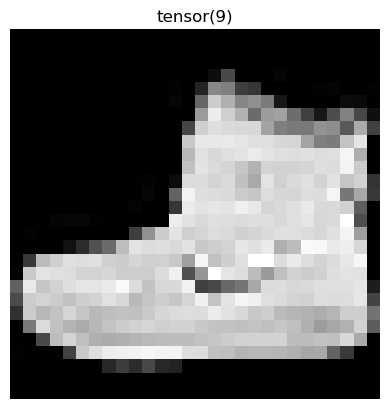

In [24]:
plt.imshow(trainData.data[0], cmap='gray')
plt.title(trainData.targets[0])
plt.axis(False)

In [56]:
class FashionModelLinear(nn.Module):

    def __init__(self, inFeatures, hiddenFeatures, outFeatures):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(inFeatures, hiddenFeatures),
            nn.ReLU(),
            nn.Linear(hiddenFeatures, outFeatures)
        )

    def forward(self, x):
        return self.layer(x)
    

model = FashionModelLinear(inFeatures=28*28, hiddenFeatures=256, outFeatures=10)

# test = torch.rand(1, 28, 28)
# model(test)

In [65]:
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torch.optim as optim
from tqdm import tqdm

device = torch.device("cpu")
model.to(device)

trainTensor = TensorDataset(trainData.data, trainData.targets)
testTensor = TensorDataset(testData.data, testData.targets)


trainloader = DataLoader(trainTensor, batch_size=64, shuffle=True)
testLoader = DataLoader(testTensor, batch_size=64)

epochs = 20
lossFn = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=1e-3)

for each_epoch in range(epochs):
    model.train()
    trainLoss = 0.0
    loop = tqdm(trainloader, desc=f"Epoch [{each_epoch+1}/{epochs}]")
    for trainX, trainY in loop:
        trainX, trainY = trainX.to(device).float(), trainY.to(device)
        output = model(trainX)
        # print(output.shape, trainY.shape)
        lossVal = lossFn(output, trainY)
        optimizer.zero_grad()
        lossVal.backward()
        optimizer.step()
        trainLoss += lossVal.item()
    avgtrainLoss = trainLoss/len(trainloader)

    testloss = 0.0
    correct = 0
    total = 0

    model.eval()
    with torch.inference_mode():
        for testX, testY in testLoader:
            testX, testY = testX.to(device).float(), testY.to(device)
            pred = model(testX)
            losstest = lossFn(pred, testY)
            testloss += losstest.item()

            predicted = torch.argmax(pred, dim=1)
            correct += (predicted == testY).sum().item()
            total += testY.size(0)
            # print(val, pred)
    accuracy = 100 * correct / total
    avgtestLoss = testloss/len(testLoader)
    print(f"Average Train Loss is : {avgtrainLoss} and Test Loss is : {avgtestLoss} and Accuracy is {accuracy}")
    # break

Epoch [1/20]: 100%|██████████| 938/938 [00:01<00:00, 739.96it/s]


Average Train Loss is : 0.3314052537591981 and Test Loss is : 0.7893593122435224 and Accuracy is 84.63


Epoch [2/20]: 100%|██████████| 938/938 [00:01<00:00, 816.62it/s]


Average Train Loss is : 0.32210175034159155 and Test Loss is : 0.7994424789005025 and Accuracy is 84.56


Epoch [3/20]: 100%|██████████| 938/938 [00:01<00:00, 785.76it/s]


Average Train Loss is : 0.32132239241812277 and Test Loss is : 0.7120408688191395 and Accuracy is 85.21


Epoch [4/20]: 100%|██████████| 938/938 [00:01<00:00, 894.89it/s]


Average Train Loss is : 0.31938425526181774 and Test Loss is : 0.8965131854935057 and Accuracy is 83.74


Epoch [5/20]: 100%|██████████| 938/938 [00:01<00:00, 823.91it/s]


Average Train Loss is : 0.3441306862042848 and Test Loss is : 0.7588304665627753 and Accuracy is 83.98


Epoch [6/20]: 100%|██████████| 938/938 [00:01<00:00, 809.53it/s]


Average Train Loss is : 0.34124074234510027 and Test Loss is : 0.74790143055521 and Accuracy is 84.73


Epoch [7/20]: 100%|██████████| 938/938 [00:01<00:00, 822.37it/s]


Average Train Loss is : 0.3694148899903938 and Test Loss is : 0.966350492588274 and Accuracy is 82.7


Epoch [8/20]: 100%|██████████| 938/938 [00:01<00:00, 840.41it/s]


Average Train Loss is : 0.33066857021564106 and Test Loss is : 0.7570118684867385 and Accuracy is 83.46


Epoch [9/20]: 100%|██████████| 938/938 [00:01<00:00, 694.18it/s]


Average Train Loss is : 0.30757385581286983 and Test Loss is : 0.7667215358299814 and Accuracy is 84.01


Epoch [10/20]: 100%|██████████| 938/938 [00:01<00:00, 786.45it/s]


Average Train Loss is : 0.31739015889955735 and Test Loss is : 0.8060247658923932 and Accuracy is 83.71


Epoch [11/20]: 100%|██████████| 938/938 [00:01<00:00, 795.38it/s]


Average Train Loss is : 0.32283773384432296 and Test Loss is : 0.7414308795883398 and Accuracy is 84.24


Epoch [12/20]: 100%|██████████| 938/938 [00:01<00:00, 797.83it/s]


Average Train Loss is : 0.33641190870182475 and Test Loss is : 0.716356705043726 and Accuracy is 83.12


Epoch [13/20]: 100%|██████████| 938/938 [00:01<00:00, 880.54it/s]


Average Train Loss is : 0.33194534617986504 and Test Loss is : 0.7167539489307221 and Accuracy is 83.78


Epoch [14/20]: 100%|██████████| 938/938 [00:00<00:00, 955.19it/s]


Average Train Loss is : 0.3229131973437917 and Test Loss is : 0.7873229933012823 and Accuracy is 84.7


Epoch [15/20]: 100%|██████████| 938/938 [00:01<00:00, 934.36it/s]


Average Train Loss is : 0.3161509492551721 and Test Loss is : 0.7126976041846974 and Accuracy is 84.81


Epoch [16/20]: 100%|██████████| 938/938 [00:00<00:00, 962.75it/s]


Average Train Loss is : 0.31752072899802913 and Test Loss is : 0.7501153413467346 and Accuracy is 84.33


Epoch [17/20]: 100%|██████████| 938/938 [00:00<00:00, 960.45it/s]


Average Train Loss is : 0.3330784899466582 and Test Loss is : 0.8348944010628256 and Accuracy is 84.18


Epoch [18/20]: 100%|██████████| 938/938 [00:00<00:00, 952.54it/s]


Average Train Loss is : 0.34012514926286647 and Test Loss is : 0.9022228908576783 and Accuracy is 84.58


Epoch [19/20]: 100%|██████████| 938/938 [00:00<00:00, 964.71it/s]


Average Train Loss is : 0.3343734875766199 and Test Loss is : 0.7469343291536258 and Accuracy is 84.92


Epoch [20/20]: 100%|██████████| 938/938 [00:00<00:00, 955.03it/s]


Average Train Loss is : 0.3118642745400543 and Test Loss is : 0.7357124373032029 and Accuracy is 84.94
